In [33]:
import matplotlib.pyplot as plt
import json
import os

In [34]:
validation_results = None
print(os.getcwd())
with open('./../data/val_resl.json') as f:
    validation_results = json.load(f)
print(validation_results)

c:\Users\venus\Desktop\spreading influence identification\testing_cnn\models
[{'graph_name': 'ba_edgelist_exp1_3000_4', 'validation_loss': 2.835048647739313e-06, 'spearman_rank': 0.6010939125954117, 'kendall_tau': 0.5424982183930398, 'duration': 47.65967679023743}, {'graph_name': 'ba_edgelist_exp1_4000_4', 'validation_loss': 3.3954272591927292e-06, 'spearman_rank': 0.4602742789379791, 'kendall_tau': 0.48006667320732477, 'duration': 80.8810031414032}, {'graph_name': 'ba_edgelist_exp1_5000_4', 'validation_loss': 3.828769740539428e-06, 'spearman_rank': 0.4995559262092836, 'kendall_tau': 0.49817238019312227, 'duration': 166.7456202507019}, {'graph_name': 'ba_edgelist_exp1_6000_4', 'validation_loss': 4.219576220672631e-06, 'spearman_rank': 0.49186467361183717, 'kendall_tau': 0.48415600374747225, 'duration': 216.77359104156494}, {'graph_name': 'ba_edgelist_exp1_7000_4', 'validation_loss': 4.412967318265665e-06, 'spearman_rank': 0.35192490917075675, 'kendall_tau': 0.40842563781346775, 'durati

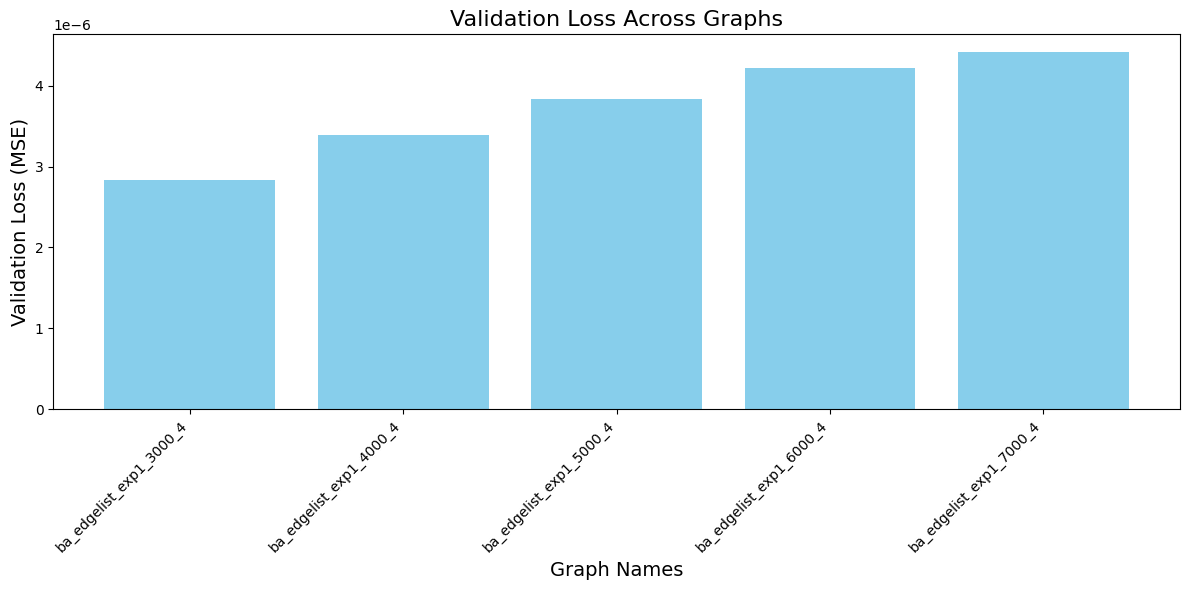

In [35]:

# Extract validation loss and graph names
graph_names = [result['graph_name'] for result in validation_results]
validation_losses = [result['validation_loss'] for result in validation_results]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(graph_names, validation_losses, color='skyblue')
plt.xlabel("Graph Names", fontsize=14)
plt.ylabel("Validation Loss (MSE)", fontsize=14)
plt.title("Validation Loss Across Graphs", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('./../img/validation_loss_across_graphs.png', dpi=300)
plt.show()

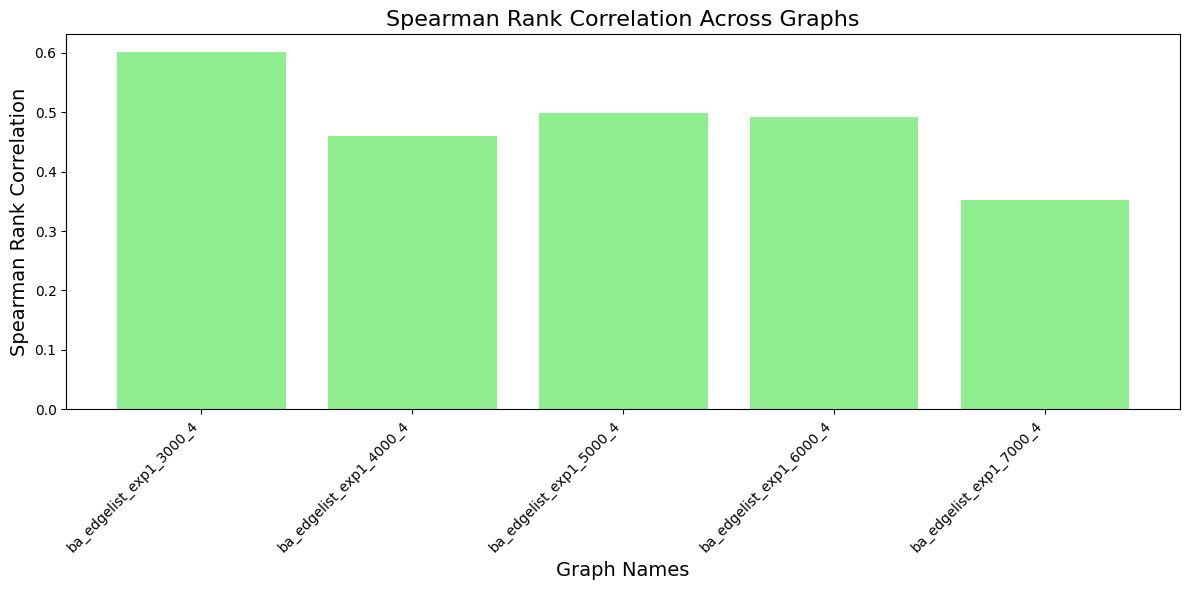

In [36]:
# Extract Spearman correlation values
spearman_ranks = [result['spearman_rank'] for result in validation_results]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(graph_names, spearman_ranks, color='lightgreen')
plt.xlabel("Graph Names", fontsize=14)
plt.ylabel("Spearman Rank Correlation", fontsize=14)
plt.title("Spearman Rank Correlation Across Graphs", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('./../img/spearman_rank_across_graphs.png', dpi=300)
plt.show()


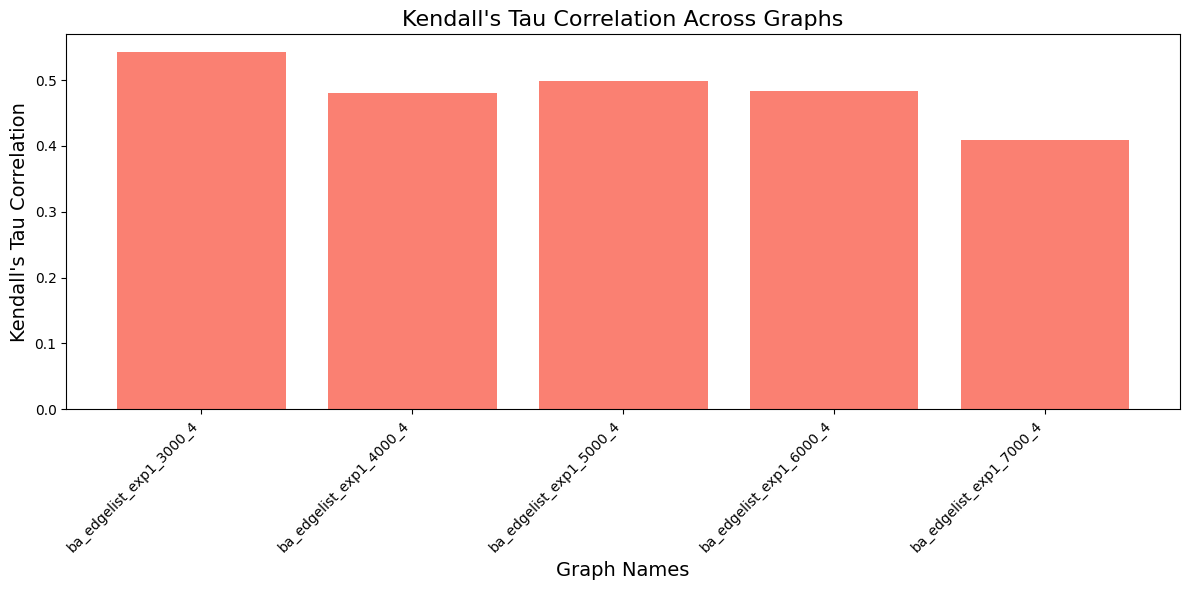

In [37]:
# Extract Kendall's Tau values
kendall_taus = [result['kendall_tau'] for result in validation_results]

# Plot
plt.figure(figsize=(12, 6))
plt.bar(graph_names, kendall_taus, color='salmon')
plt.xlabel("Graph Names", fontsize=14)
plt.ylabel("Kendall's Tau Correlation", fontsize=14)
plt.title("Kendall's Tau Correlation Across Graphs", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('./../img/kendalls_tau_across_graphs.png', dpi=300)
plt.show()


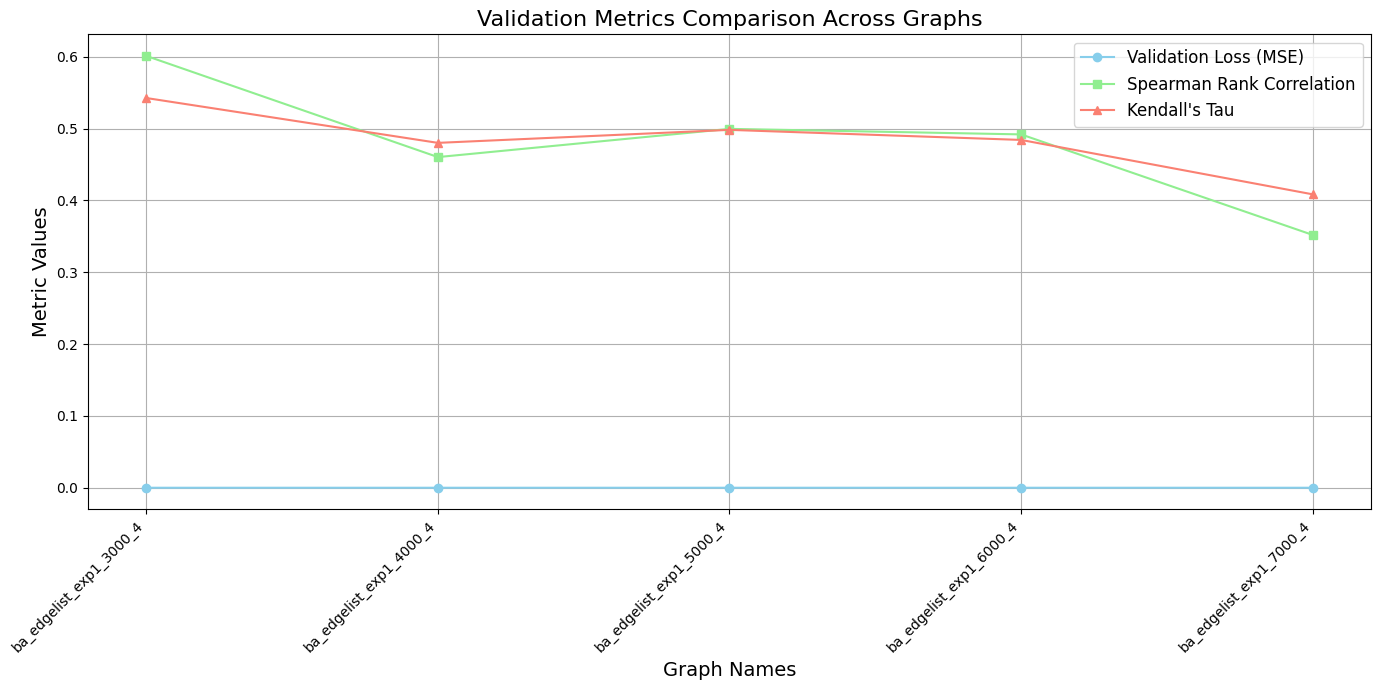

In [38]:
# Plot
plt.figure(figsize=(14, 7))
plt.plot(graph_names, validation_losses, label="Validation Loss (MSE)", marker='o', color='skyblue')
plt.plot(graph_names, spearman_ranks, label="Spearman Rank Correlation", marker='s', color='lightgreen')
plt.plot(graph_names, kendall_taus, label="Kendall's Tau", marker='^', color='salmon')

plt.xlabel("Graph Names", fontsize=14)
plt.ylabel("Metric Values", fontsize=14)
plt.title("Validation Metrics Comparison Across Graphs", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.savefig('./../img/metrics_comparison_across_graphs.png', dpi=300)
plt.show()


In [39]:
for result in validation_results:
    graph_name = result['graph_name']
    preds = result.get('predictions', [])
    labels = result.get('labels', [])

    if preds and labels:  # Only plot if data is available
        plt.figure(figsize=(8, 6))
        plt.scatter(labels, preds, alpha=0.7, color='purple')
        plt.plot([min(labels), max(labels)], [min(labels), max(labels)], color='red', linestyle='--', label='Ideal Fit')
        plt.xlabel("Ground Truth Labels (SIR)", fontsize=14)
        plt.ylabel("Predicted Labels (SIR)", fontsize=14)
        plt.title(f"Predictions vs Ground Truth for {graph_name}", fontsize=16)
        plt.legend(fontsize=12)
        plt.grid()
        plt.tight_layout()
        plt.savefig(f'./testing_cnn/img/pred_vs_truth_{graph_name}.png', dpi=300)
        plt.show()
